<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Cleaning-dataset" data-toc-modified-id="Cleaning-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning dataset</a></span><ul class="toc-item"><li><span><a href="#Examining-missing-values" data-toc-modified-id="Examining-missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examining missing values</a></span></li><li><span><a href="#Examining-collinearity" data-toc-modified-id="Examining-collinearity-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examining collinearity</a></span></li><li><span><a href="#Plot-relations-between--variables" data-toc-modified-id="Plot-relations-between--variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot relations between  variables</a></span></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Categorical data</a></span></li></ul></li></ul></div>

## Libraries

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning dataset

In [3]:
df = pd.read_csv("../Input/train.csv")
df_test = pd.read_csv("../Input/test.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


### Examining missing values

In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Examining collinearity

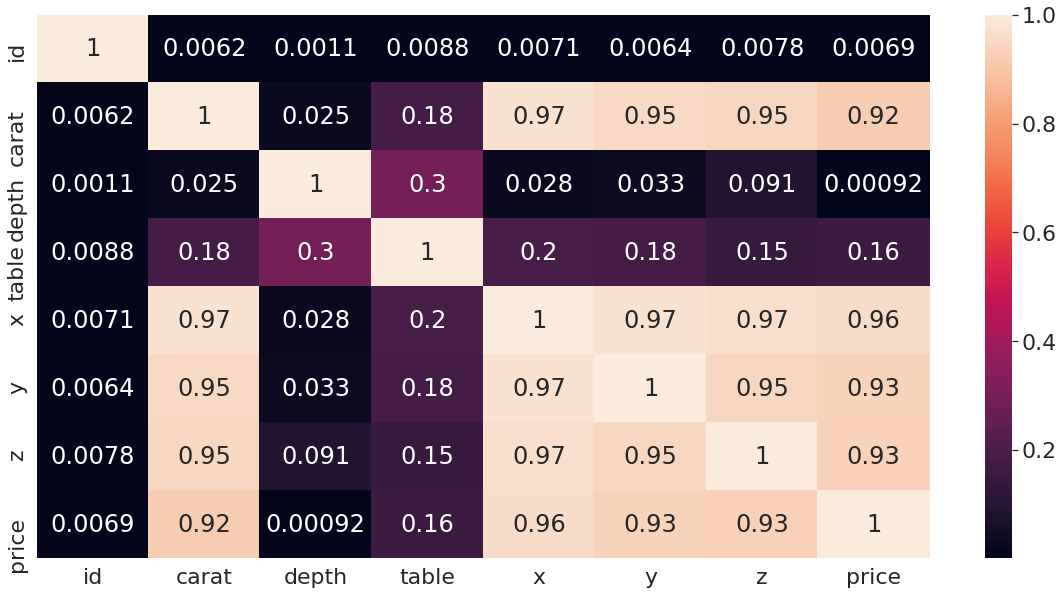

In [7]:
plt.figure(figsize = (20,10))
x = sns.set(font_scale = 2)
x = sns.heatmap(df.corr().abs(), annot = True)
figure = x.get_figure()
figure.savefig('corr.png', dpi=400)

### Plot relations between  variables

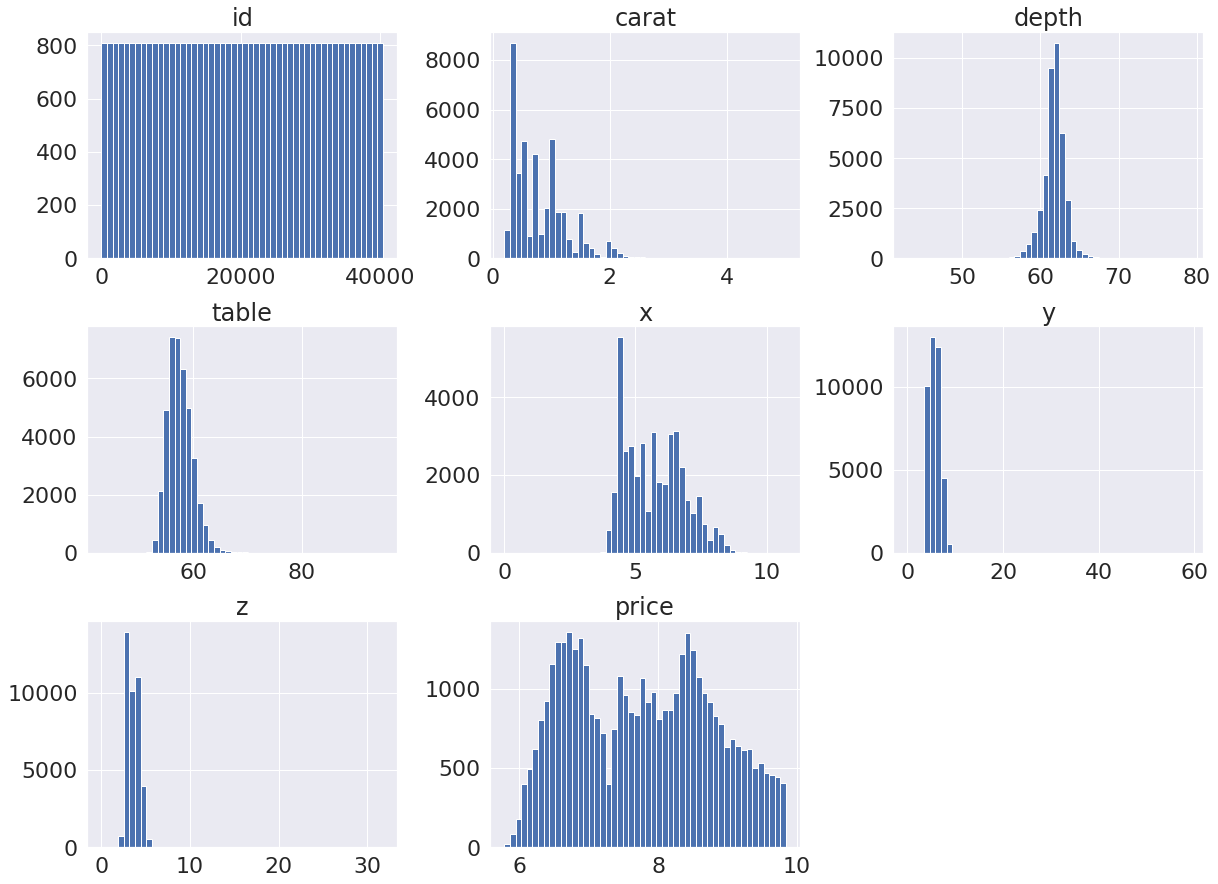

In [8]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='carat'>

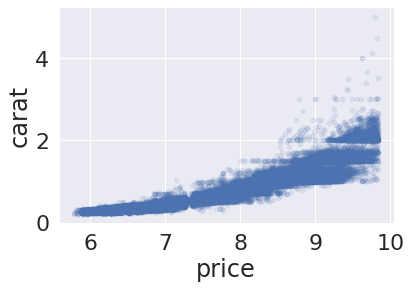

In [9]:
#as we have seen there is a strong relationship between price and carat I am going to do a catterplot only for these two variables
df.plot(kind="scatter", x="price", y="carat",alpha = 0.1)

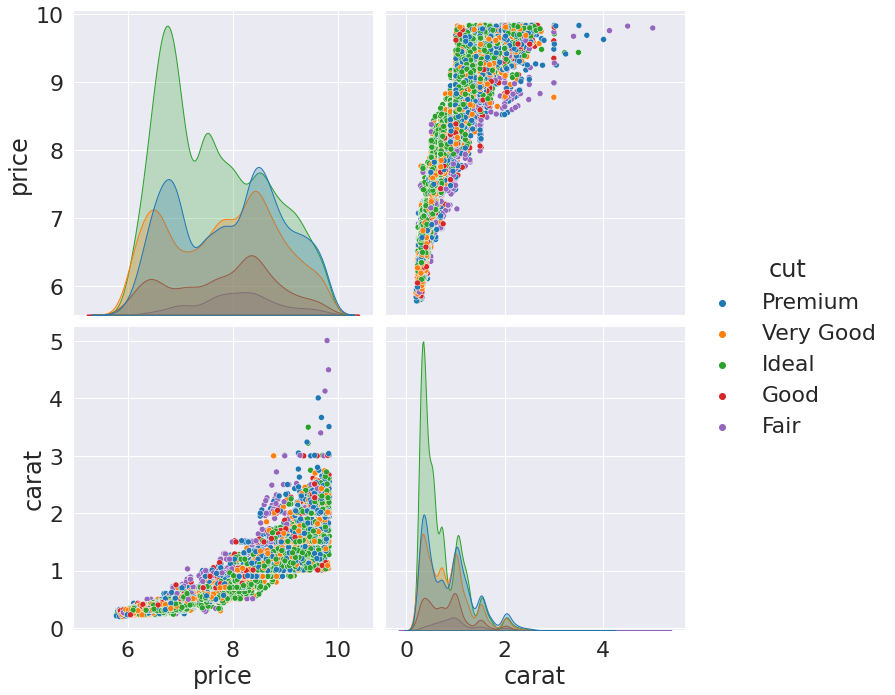

In [10]:
sns.pairplot(df[["price","carat","cut"]], hue="cut", height=5, palette="tab10")

plt.show()

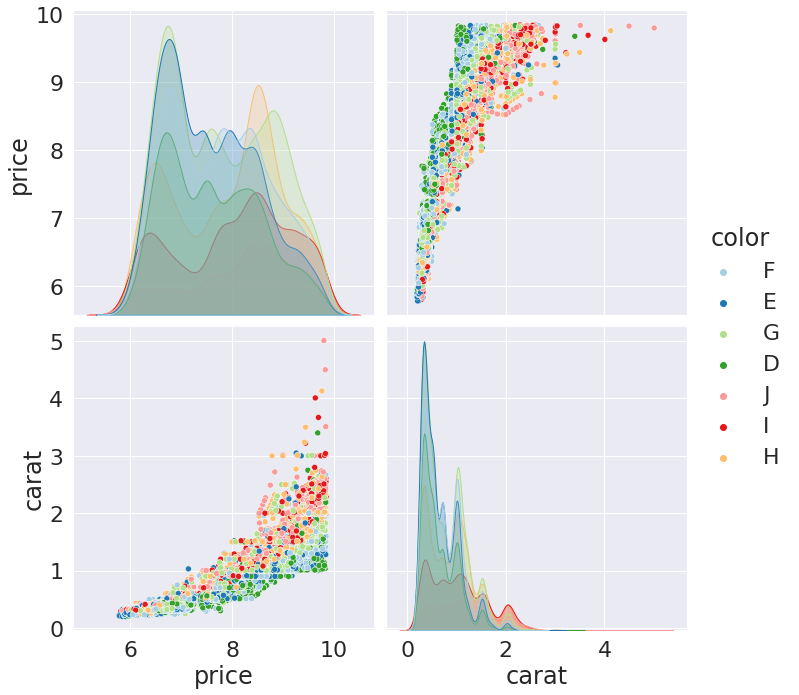

In [11]:
sns.pairplot(df[["price","carat","color"]], hue="color", height=5, palette="Paired")

plt.show()

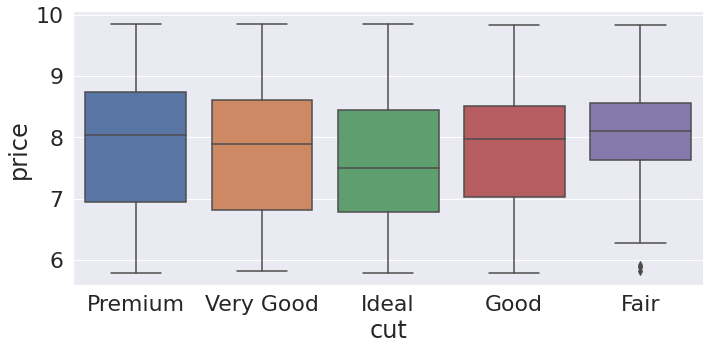

In [12]:
p = sns.catplot(x='cut', y='price', data=df, kind='box' ,aspect=2 )

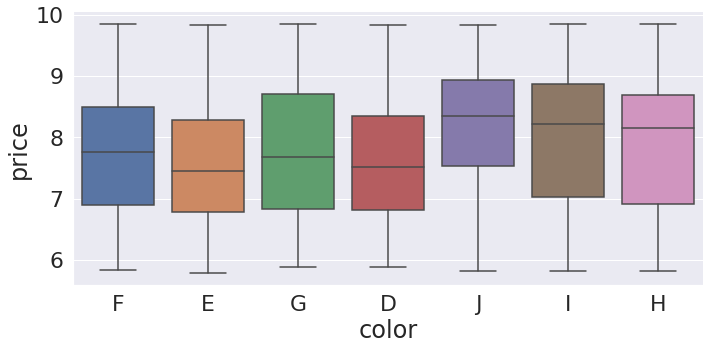

In [13]:
sns.catplot(x='color', y='price', data=df, kind='box' ,aspect=2 )

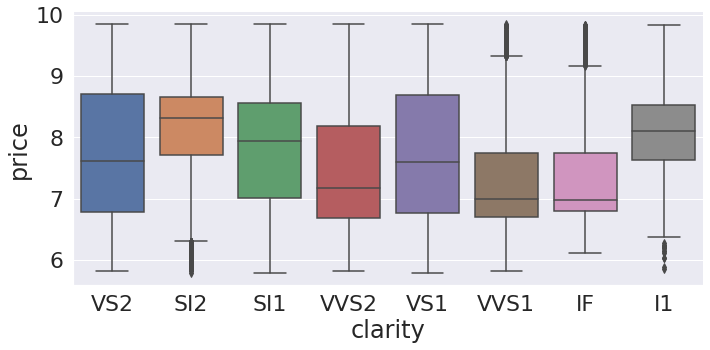

In [14]:
sns.catplot(x='clarity', y='price', data=df, kind='box' ,aspect=2)

### Categorical data

In this database we have three categorical variables. We are going to inspect them to see what they are like and see what is the best way to transform them to ordinals.

Categorical variables:
- cut 
- color    
- clarity  

As the three variables have few categories I will do an encoding

In [15]:
def clean (df):
    cut =  {'Fair': 1, 'Good': 2, 
          'Ideal': 3, 'Premium': 4,
          'Very Good': 6}
    
    
    color = {'E':1,'D':2,'F':3,
             'G':4,'H':5,'I':6,
             'J':7}

    clarity = {'I1':1,'SI2':2,
               'SI1':3,'VS2':4,'VS1':5,
               'VVS2':6,'VVS1':7,'IF':8}

    #mcoding categorical data
    df["cut"] = df["cut"].apply(lambda x: cut[x])
    df["color"] = df["color"].apply(lambda x: color[x])
    df["clarity"] = df["clarity"].apply(lambda x: clarity[x])
    
    
    #I additionally add a new column based on the relationship among variables
    #df['cut/wt']=df['cut']/df['carat']
    #df['color/wt']=df['color']/df['carat']
    #df['clarity/wt']=df['clarity']/df['carat']
    
    #Drop irrelevant variables: depth and table
    df.drop(["depth", "table", "id"], axis = 1, inplace = True)
    
    df = df.reset_index(drop=True)
    return df

In [16]:
df_test = clean(df_test)

In [17]:
df_train = clean(df)

In [18]:
df_test.to_csv("clean_test.csv", index = False)
df_train.to_csv("clean_train.csv", index = False)

In [19]:
df_test

,carat,cut,color,clarity,x,y,z
0,0.51,6,1,2,5.19,5.20,3.04
1,1.02,6,3,2,6.37,6.43,4.03
2,0.59,3,2,4,5.39,5.34,3.32
3,0.90,6,2,4,6.14,6.18,3.84
4,2.01,4,7,5,8.23,8.16,4.93
...,...,...,...,...,...,...,...
13480,1.05,4,5,3,6.50,6.45,4.01
13481,0.32,3,3,4,4.35,4.38,2.71
13482,0.41,4,7,5,4.78,4.74,2.92
13483,0.30,4,4,6,4.31,4.28,2.67
